In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from numba import cuda



In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(tf.config.experimental.list_logical_devices('GPU')) 
#cuda.select_device(0)
#cuda.close()

Num GPUs Available:  1
[LogicalDevice(name='/device:GPU:0', device_type='GPU')]


In [8]:
# path to train data and test data
data_folder_path = "../data/cropped_images/"
test_folder_path = "../data/cropped_images_test/"

In [11]:

# Define the CNN model
model2 = models.Sequential()

# First convolutional layer
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model2.add(layers.MaxPooling2D((2, 2)))

# Second convolutional layer
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))

# Third convolutional layer
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))

# Flatten the output and add fully connected layers
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(4, activation='softmax'))



In [12]:
# train and test dataset
dimension = 64
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_folder_path,
    image_size = (dimension,dimension),
    batch_size = 32,
    label_mode = 'categorical'
    
)

test_dataset =  tf.keras.preprocessing.image_dataset_from_directory(
    test_folder_path,
    image_size = (dimension,dimension),
    batch_size = 32,
    label_mode = 'categorical'
    
)

Found 5724 files belonging to 4 classes.
Found 633 files belonging to 4 classes.


In [13]:
# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
model2.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model2.fit(train_dataset, validation_data= test_dataset,epochs=30)


Epoch 1/30
179/179 [==============================] - 3s 14ms/step - loss: 2.6056 - accuracy: 0.3587 - val_loss: 1.3613 - val_accuracy: 0.3570
Epoch 2/30
179/179 [==============================] - 2s 13ms/step - loss: 1.3505 - accuracy: 0.3653 - val_loss: 1.3499 - val_accuracy: 0.3476
Epoch 3/30
179/179 [==============================] - 2s 13ms/step - loss: 1.2904 - accuracy: 0.4011 - val_loss: 1.2437 - val_accuracy: 0.4439
Epoch 4/30
179/179 [==============================] - 2s 13ms/step - loss: 1.2156 - accuracy: 0.4548 - val_loss: 1.2180 - val_accuracy: 0.4171
Epoch 5/30
179/179 [==============================] - 2s 13ms/step - loss: 1.1905 - accuracy: 0.4645 - val_loss: 1.2171 - val_accuracy: 0.4392
Epoch 6/30
179/179 [==============================] - 2s 13ms/step - loss: 1.1562 - accuracy: 0.4871 - val_loss: 1.1959 - val_accuracy: 0.4597
Epoch 7/30
179/179 [==============================] - 2s 13ms/step - loss: 1.0990 - accuracy: 0.5173 - val_loss: 1.1974 - val_accuracy: 0.4360

In [16]:
# get the result 
train_history=[]
test_history=[]
for epoch in range(len(history.history['loss'])):
    train_history.append([history.history['loss'][epoch],history.history['accuracy'][epoch] ])
    test_history.append([history.history['val_loss'][epoch],history.history['val_accuracy'][epoch] ])

train_history = np.array(train_history)
test_history = np.array(test_history)


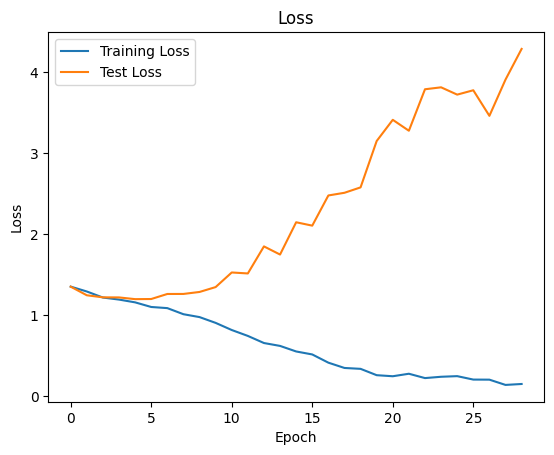

In [18]:
# plot the results - loss
plt.plot(train_history[:,0])
plt.plot(test_history[:,0])
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Test Loss'])
plt.show()

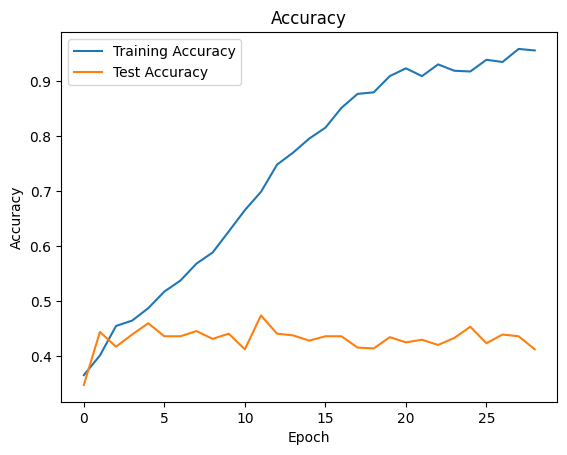

In [19]:
# plot the results - accuracy
plt.plot(train_history[:,1])
plt.plot(test_history[:,1])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.show()